In [1]:
import matplotlib.pyplot as plt
import cv2
import zipfile
import numpy as np
import pandas as pd
from nebula.common import write_pickle, read_pickle, display, to_scale_one
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

In [42]:
def create_label_map(labels):
    label_set = set()
    for lt in labels:
        label_set.add(lt)
        
    label_set = list(label_set)
    label_set.sort()

    label_map = {}
    count = 0
    for l in label_set:
        label_map[l] = count
        count += 1
        
    return label_map


def to_tsne(df, n_components):
    data_matrix = np.array(list(df["image"].values))
    
    transformer = TSNE(
        n_components=2, 
        learning_rate='auto',
        init='random', perplexity=3
    )
    
    res = transformer.fit_transform(data_matrix)
    
    return res


def plot_embedding(X, y, label_map, ax=None, title=""):
    if ax is None:
        _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)
    
    rmap = {v:k for k, v in label_map.items()}

    for lid in label_map.values():
        ax.scatter(
            *X[y == lid].T,
            marker="o",
            s=5,
            color=plt.cm.Dark2(lid),
            label=rmap[lid],
            alpha=0.425,
            zorder=2,
        )
    
    ax.set_title(title, fontsize="10")
    ax.legend(fontsize="5", loc="upper right", framealpha=0.5)
    ax.axis("off")

In [25]:
easy_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_sift_amiya.pkl'
easy_df = read_pickle(easy_path)
easy_res = to_tsne(easy_df, 2)

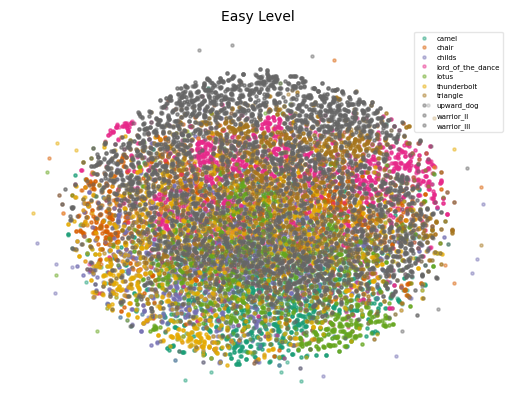

In [43]:
easy_label_map_a = create_label_map(easy_df["label_a"])

easy_y = np.array(easy_df["label_a"].map(easy_label_map_a).to_list())
plot_embedding(easy_res, easy_y, easy_label_map_a, title="Easy Level")

In [14]:
medium_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df_sift_amiya.pkl'
medium_df = read_pickle(medium_path)
medium_res = to_tsne(medium_df, 2)

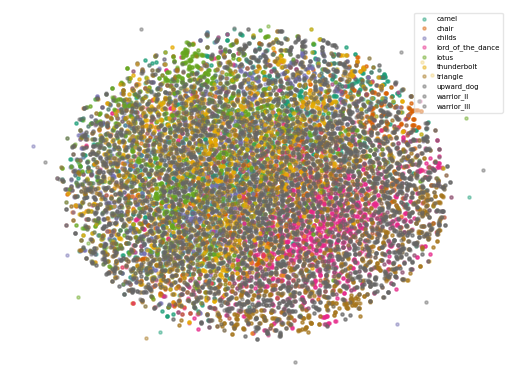

In [29]:
medium_label_map_a = create_label_map(medium_df["label_a"])

medium_y = np.array(medium_df["label_a"].map(medium_label_map_a).to_list())
plot_embedding(medium_res, medium_y, medium_label_map_a)

In [16]:
hard_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_hard_df_sift_amiya.pkl'
hard_df = read_pickle(hard_path)
hard_res = to_tsne(hard_df, 2)

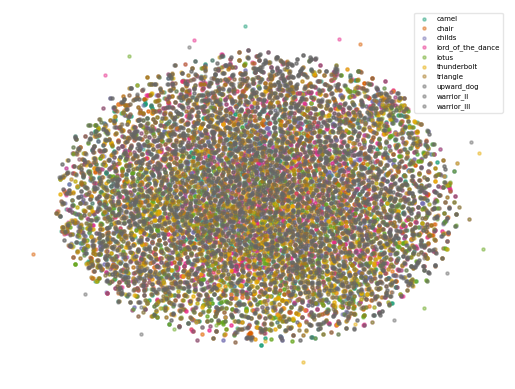

In [30]:
hard_label_map_a = create_label_map(hard_df["label_a"])

hard_y = np.array(hard_df["label_a"].map(hard_label_map_a).to_list())
plot_embedding(hard_res, hard_y, hard_label_map_a)

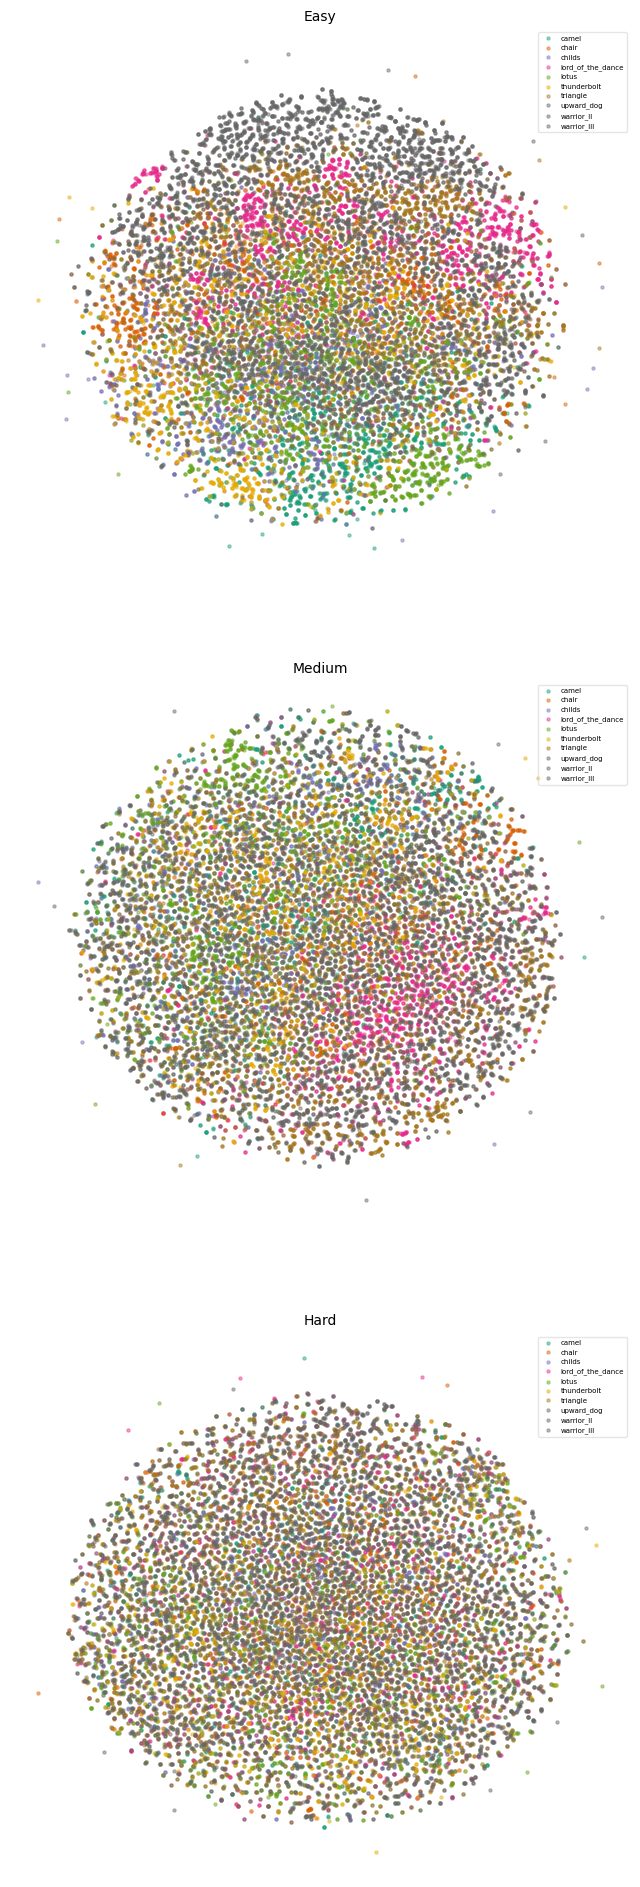

In [47]:
fc = 8
fr = 8
nc = 1
nr = 3
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(fc * nc, fr * nr))
axs_list = [a for a in axs.flat] if hasattr(axs, "flat") else [axs]

plot_embedding(easy_res, easy_y, easy_label_map_a, axs_list[0], "Easy")
plot_embedding(medium_res, medium_y, medium_label_map_a, axs_list[1], "Medium")
plot_embedding(hard_res, hard_y, hard_label_map_a, axs_list[2], "Hard")

save_path = "C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/sift_tsne.png"
plt.savefig(save_path)